In [1]:
### Image classification
from transformers import pipeline
image_classifier=pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


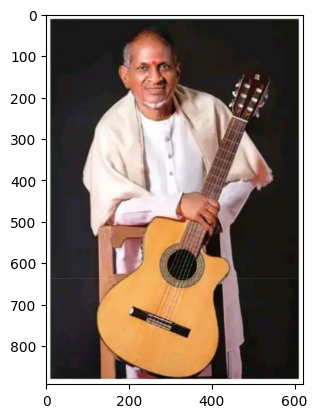

In [2]:
from PIL import Image
from matplotlib import pyplot as plt
image=Image.open("/content/Raja.jpg")
plt.imshow(image)

In [3]:
image_classifier(image)

[{'label': 'acoustic guitar', 'score': 0.7765098810195923},
 {'label': 'vestment', 'score': 0.12076787650585175},
 {'label': 'pick, plectrum, plectron', 'score': 0.014878889545798302},
 {'label': 'electric guitar', 'score': 0.010165412910282612},
 {'label': "academic gown, academic robe, judge's robe",
  'score': 0.005301372613757849}]

In [5]:
### vqa
from transformers import pipeline
vqa=pipeline("vqa")

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/470M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


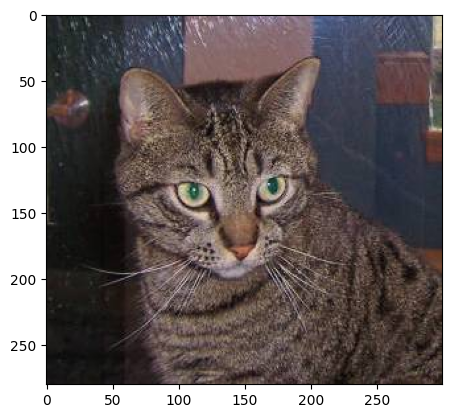

In [6]:
from PIL import Image
from matplotlib import pyplot as plt
image=Image.open("/content/cat.1.jpg")
plt.imshow(image)

In [11]:
vqa(question="What is the cat doing?",image=image)

[{'score': 0.6441355347633362, 'answer': 'staring'},
 {'score': 0.5114263892173767, 'answer': 'sitting'},
 {'score': 0.38605543971061707, 'answer': 'looking'},
 {'score': 0.26681721210479736, 'answer': 'looking at camera'},
 {'score': 0.07314401119947433, 'answer': 'resting'}]

In [ ]:
### Try with atleast 3 images-> mistakes

In [13]:
vqa_1=pipeline("vqa",model="Salesforce/blip-vqa-capfilt-large")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.54G [00:03<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/524 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

Device set to use cpu


In [14]:
vqa_1(question="What is the cat doing?",image=image)

[{'answer': 'sitting'}]

In [20]:
### Image to text/Image captioning
img_text=pipeline("image-to-text",model="Salesforce/blip-image-captioning-large")

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

Device set to use cpu


In [21]:
img_text(image)

[{'generated_text': 'there is a cat that is sitting on a table in front of a mirror'}]

In [ ]:
### image classification,vqa,captioning
### input by upload

#### Test with url

In [26]:
img_text("https://images.unsplash.com/photo-1583337130417-3346a1be7dee?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1470&q=80")

[{'generated_text': 'puppy in yellow shirt sitting on blue background with blue background'}]

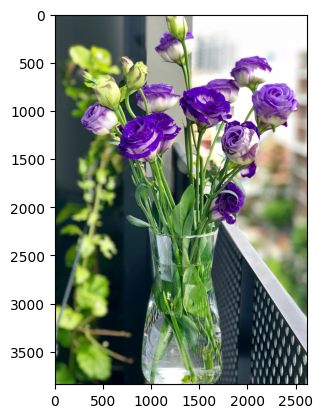

In [28]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

url = "https://images.pexels.com/photos/757889/pexels-photo-757889.jpeg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display in a Jupyter notebook
plt.imshow(img)

In [30]:
img_text(img)

[{'generated_text': 'purple flowers in a vase on a table outside'}]

In [32]:
image_classifier(img)

[{'label': 'vase', 'score': 0.8405227661132812},
 {'label': 'pot, flowerpot', 'score': 0.1371091604232788},
 {'label': 'bannister, banister, balustrade, balusters, handrail',
  'score': 0.0044273557141423225},
 {'label': 'water jug', 'score': 0.0028504400979727507},
 {'label': 'pitcher, ewer', 'score': 0.0008460279204882681}]

In [36]:
vqa_1(question="What is in the image?",image=img)

[{'answer': 'flowers'}]

In [37]:
vqa(question="How many flowers?",image=img)

[{'score': 0.2537846863269806, 'answer': '15'},
 {'score': 0.22953394055366516, 'answer': '14'},
 {'score': 0.21455571055412292, 'answer': '12'},
 {'score': 0.19228042662143707, 'answer': '16'},
 {'score': 0.1464487910270691, 'answer': '10'}]